In [1]:
import ipywidgets
import pyvisa
from pyvisa import ResourceManager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
with open('Signaux\Test TX 11-09\Absorption Coefficient (FeutreFaibleDensite, Small).txt') as file_sig:
    file_content = file_sig.readlines()

print(type(file_content),file_content)

<class 'list'> ['Header Size:\t 78\t \n', 'Pulse Version:\t 42\t \n', 'Decimal Symbol:\t,\t \n', 'Date Format:\tdd/MM/yyyy\t \n', 'Time Format:\tHH:mm:ss:mmm\t \n', 'Data Type:\tReal\t \n', 'Slice:\tFalse\t \n', 'Z-Axis type:\tLinear\t \n', 'Z-Axis size:\t1\t \n', 'Z-Axis unit:\t \t \n', 'Z-Axis first value:\t 0,0000000000e+000\t \n', 'Z-Axis delta:\t 1,0000000000e+000\t \n', 'X-Axis type:\tLinear\t \n', 'X-Axis size:\t6401\t \n', 'X-Axis unit:\tHz\t \n', 'X-Axis first value:\t 0,0000000000e+000\t \n', 'X-Axis delta:\t 1,0000000000e+000\t \n', '\t \t \n', 'AmplitudeUnit:\t \t \n', 'Analyzer:\tFFT_Spectrum_Averaging\t \n', 'AnalyzerName:\tFFT Analyzer\t \n', '\t \t \n', '\t \t \n', 'Bipolar:\tFalse\t \n', 'CenterFrequency:\t 3,2000000000e+003\t \n', '\t \t \n', '\t \t \n', '\t \t \n', '\t \t \n', 'dBReference:\t 1,0000000000e+000\t \n', '\t \t \n', '\t \t \n', '\t \t \n', 'Domain:\t1\t \n', 'Function:\tFrequency Response\t \n', '\t \t \n', '\t \t \n', '\t \t \n', '\t \t \n', 'MultiBuffe

In [3]:
def file_content_to_df(file_content):
    sig_line = [ line for line in file_content if line[0] in [str(x) for x in np.arange(0,10) ]]
    sig_items = [sig_line[i].split('\t') for i in range(len(sig_line))]
    if len(sig_items[0]) == 4 :
        list_col = ['0','id','col1','col2'] 
        last_col = 'col2'
    elif len(sig_items[0]) == 3 :
        list_col = ['0','id','col1']
        last_col = 'col1'

    df_sig = pd.DataFrame(sig_items, columns = list_col)
    df_sig[last_col] = df_sig[last_col].apply(lambda x: x[:-1])
    df_sig.head(3)


    for col in list_col[1:]:
        df_sig[col] = df_sig[col].apply(lambda x : x.replace(',','.'))
        df_sig[col] = df_sig[col].apply(lambda x : x.split('e'))
        df_sig[col] = df_sig[col].apply(lambda x : float(x[0]) * (10**float(x[1])))

    return df_sig

In [4]:
df_sig = file_content_to_df(file_content)

In [5]:
## Transfert Function
def Transfert_f(df_sig):
    fig,ax = plt.subplots(1,3,figsize = (10,5))
    ax[0].plot(np.clip(df_sig['col1'],a_min=0,a_max=None))
    ax[0].set_yscale('linear')

    ax[1].plot(np.clip(df_sig['col2'],a_min=0,a_max=None))
    ax[1].set_yscale('linear')

    ax[2].plot(np.sqrt(df_sig['col1']**2 + df_sig['col2']**2))
    # np.abs([complex(x,y) for x,y in list(zip(df_sig['col1'],df_sig['col2']))])
    ax[2].set_yscale('linear')

def coeff(df_sig):
    plt.close('all')
    fig,ax = plt.subplots(1,2,figsize = (10,5))
    ax[0].plot(20*np.log(df_sig['col1'])) # U col1 * qqc pour etre en Pa
    ax[1].plot(np.clip(df_sig['col1'],a_max=None,a_min=0))



c:\Users\mtlsa\anaconda3\envs\conda_tx_2\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mtlsa\anaconda3\envs\conda_tx_2\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


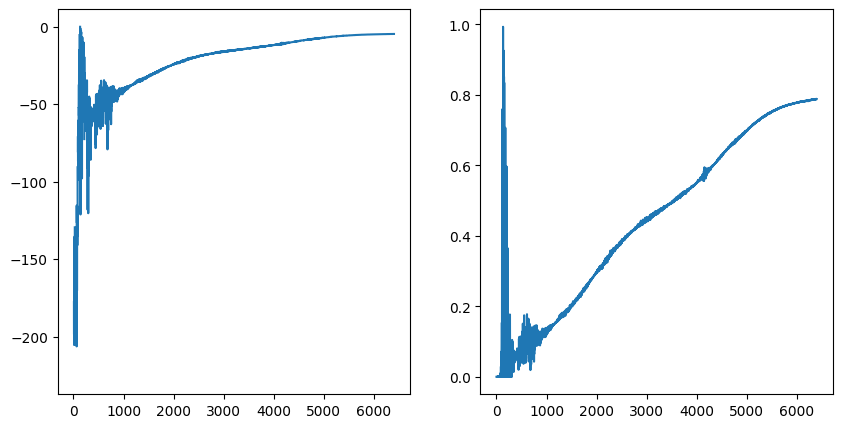

In [6]:
coeff(df_sig)

Correct, np.log(x) is the Natural Log (base e log) of x.

For other bases, remember this law of logs: log-b(x) = log-k(x) / log-k(b) where log-b is the log in some arbitrary base b, and log-k is the log in base k, e.g.

here k = e

l = np.log(x) / np.log(100)
and l is the log-base-100 of x